In [38]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from xgboost import XGBRegressor
import sys
sys.path.append('/project/xgb-research/tiny-xgboost/')
import tiny_xgboost as txgb
from sklearn.model_selection import train_test_split
from tqdm import tqdm_notebook as tqdm

In [31]:
def r_2(preds, values):
    
    return 1 - np.mean(np.power(preds - values, 2))/np.var(values)

In [36]:
def generate_data(N):

    X = np.random.uniform(0,1, N)

    y_1 = 3*X + np.random.normal(0, 0.5, N)
    y_2 = -4*X + np.random.normal(0, 0.65, N)

    y = np.array(list(zip(y_1, y_2)))

    X = X.reshape(-1,1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    X_train, X_eval, y_train, y_eval = train_test_split(X_train, y_train, test_size=0.2)
    
    return X_train, X_eval, X_test, y_train, y_eval, y_test

In [26]:
xgb_regressor = XGBRegressor(max_depth=2, learning_rate=0.1, n_estimators=20_000, early_stopping_rounds=10, 
                            objective='reg:squarederror', eval_metric='rmse', reg_lambda=1.0,
                            min_child_weight=1, base_score=0.5)

xgb_regressor.fit(X_train, y_train, eval_set=[(X_eval, y_eval)], verbose=True)

[0]	validation_0-rmse:2.02316
[1]	validation_0-rmse:1.83994
[2]	validation_0-rmse:1.67615
[3]	validation_0-rmse:1.53064
[4]	validation_0-rmse:1.40029
[5]	validation_0-rmse:1.28582
[6]	validation_0-rmse:1.18513
[7]	validation_0-rmse:1.09618
[8]	validation_0-rmse:1.01836
[9]	validation_0-rmse:0.95040
[10]	validation_0-rmse:0.89123
[11]	validation_0-rmse:0.84084
[12]	validation_0-rmse:0.79764
[13]	validation_0-rmse:0.76058
[14]	validation_0-rmse:0.72905
[15]	validation_0-rmse:0.70271
[16]	validation_0-rmse:0.68053
[17]	validation_0-rmse:0.66224
[18]	validation_0-rmse:0.64681
[19]	validation_0-rmse:0.63409
[20]	validation_0-rmse:0.62368
[21]	validation_0-rmse:0.61500
[22]	validation_0-rmse:0.60799
[23]	validation_0-rmse:0.60238
[24]	validation_0-rmse:0.59766
[25]	validation_0-rmse:0.59378
[26]	validation_0-rmse:0.59070
[27]	validation_0-rmse:0.58818
[28]	validation_0-rmse:0.58614
[29]	validation_0-rmse:0.58460
[30]	validation_0-rmse:0.58319
[31]	validation_0-rmse:0.58213
[32]	validation_0-

XGBRegressor(base_score=0.5, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=20000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [34]:
og_preds = xgb_regressor.predict(X_test)

r2_1 = r_2(og_preds[:, 0], y_test[:, 0])
r2_2 = r_2(og_preds[:, 1], y_test[:, 1])
print("Task 1 R^2=%.5f\t Tasl 2 R^2='%.5f"%(r2_1, r2_2))

Task 1 R^2=0.74204	 Tasl 2 R^2='0.76241


In [27]:
og_params = xgb_regressor.get_params()

learner_params = {}

for attribute in ["objective", "max_depth", "n_estimators", "early_stopping_rounds", "learning_rate", 
                 "base_score", "reg_lambda", "min_child_weight"]:
    learner_params[attribute] = og_params[attribute]
    

txgb_regressor = txgb.TinyXGBRegressor(**learner_params)
txgb_regressor.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=True)

[0]	train-loss=2.02669, val-loss=2.04555
[1]	train-loss=1.84413, val-loss=1.86194
[2]	train-loss=1.68115, val-loss=1.69767
[3]	train-loss=1.53644, val-loss=1.55199
[4]	train-loss=1.40747, val-loss=1.42199
[5]	train-loss=1.29365, val-loss=1.30726
[6]	train-loss=1.19296, val-loss=1.20621
[7]	train-loss=1.10421, val-loss=1.11694
[8]	train-loss=1.02658, val-loss=1.03910
[9]	train-loss=0.95868, val-loss=0.97070
[10]	train-loss=0.89979, val-loss=0.91134
[11]	train-loss=0.84885, val-loss=0.86033
[12]	train-loss=0.80496, val-loss=0.81649
[13]	train-loss=0.76729, val-loss=0.77860
[14]	train-loss=0.73523, val-loss=0.74610
[15]	train-loss=0.70818, val-loss=0.71893
[16]	train-loss=0.68524, val-loss=0.69578
[17]	train-loss=0.66600, val-loss=0.67660
[18]	train-loss=0.64982, val-loss=0.66031
[19]	train-loss=0.63638, val-loss=0.64681
[20]	train-loss=0.62519, val-loss=0.63546
[21]	train-loss=0.61590, val-loss=0.62597
[22]	train-loss=0.60821, val-loss=0.61822
[23]	train-loss=0.60185, val-loss=0.61177
[2

In [35]:
txgb_preds = txgb_regressor.predict(X_test)

r2_1 = r_2(txgb_preds[:, 0], y_test[:, 0])
r2_2 = r_2(txgb_preds[:, 1], y_test[:, 1])
print("Task 1 R^2=%.5f\t Tasl 2 R^2='%.5f"%(r2_1, r2_2))

Task 1 R^2=0.74213	 Tasl 2 R^2='0.76259


In [53]:
trad_logger = []
trad_stderrs = []
thunder_logger = []
thunder_stderrs = []
md_scanner = [1,2,3,4,5,6,7,8]
for MD in md_scanner:

    trad_method = []
    thunder_method = []

    for i in tqdm(range(10)):
        X_train, X_eval, X_test, y_train, y_eval, y_test = generate_data(10_000)

        xgb_regressor = XGBRegressor(max_depth=MD, learning_rate=0.1, n_estimators=20_000, early_stopping_rounds=10, 
                                objective='reg:squarederror', eval_metric='rmse', reg_lambda=1.0,
                                min_child_weight=1, base_score=0.5)

        xgb_regressor.fit(X_train, y_train, eval_set=[(X_eval, y_eval)], verbose=False)

        #some BS here to assure the same parameters are used
        og_params = xgb_regressor.get_params()

        learner_params = {}

        for attribute in ["objective", "max_depth", "n_estimators", "early_stopping_rounds", "learning_rate", 
                         "base_score", "reg_lambda", "min_child_weight"]:
            learner_params[attribute] = og_params[attribute]


        txgb_regressor = txgb.TinyXGBRegressor(**learner_params)
        txgb_regressor.fit(X_train, y_train, eval_set=(X_test, y_test), verbose=False)
        
        og_preds = xgb_regressor.predict(X_test)
        trad_method.append([r_2(og_preds[:, 0], y_test[:, 0]),
                            r_2(og_preds[:, 1], y_test[:, 1])])


        txgb_preds = txgb_regressor.predict(X_test)
        thunder_method.append([r_2(txgb_preds[:, 0], y_test[:, 0]), 
                              r_2(txgb_preds[:, 1], y_test[:, 1])])
        
    trad_logger.append(np.mean(trad_method))
    thunder_logger.append(np.mean(thunder_method))
    trad_stderrs.append(np.std(trad_method)/np.sqrt(len(trad_method)-1))
    thunder_stderrs.append(np.std(thunder_method)/np.sqrt(len(thunder_method)-1))
        
        

        
        

/tmp/ipykernel_176/1693596680.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(10)):


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

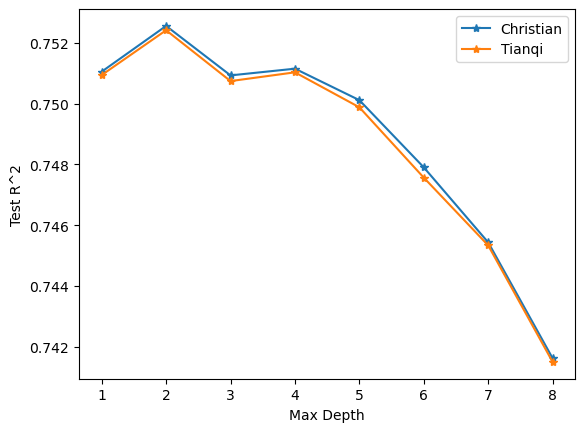

In [56]:
plt.figure()
plt.plot(md_scanner, thunder_logger, marker='*', label='Christian')
plt.plot(md_scanner, trad_logger, marker='*', label='Tianqi')
plt.legend()
plt.xlabel("Max Depth")
plt.ylabel("Test R^2")
plt.show()

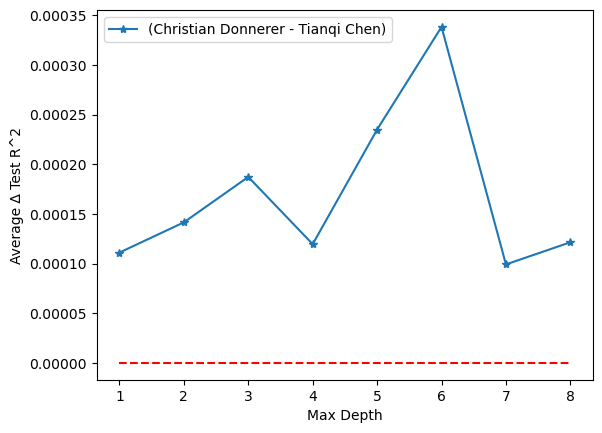

In [58]:
plt.figure()
plt.plot(md_scanner, np.array(thunder_logger) - np.array(trad_logger),
             marker='*', label='(Christian Donnerer - Tianqi Chen)')
plt.plot(md_scanner, [0]*len(md_scanner), linestyle='--', color='red')
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel("Average ∆ Test R^2")
plt.show()

In [52]:
thunder_logger

[0.7524656221333967,
 0.751974695286611,
 0.7508780598913354,
 0.7505704072521705,
 0.7483031985953768]